# polplot examples

Below are some examples of how polplot can be used. Basic examples are shown first, and then we show how to display AMPS model output, auroral images, and AMPERE maps.

Check out the docstrings of each function to see the full functionality.


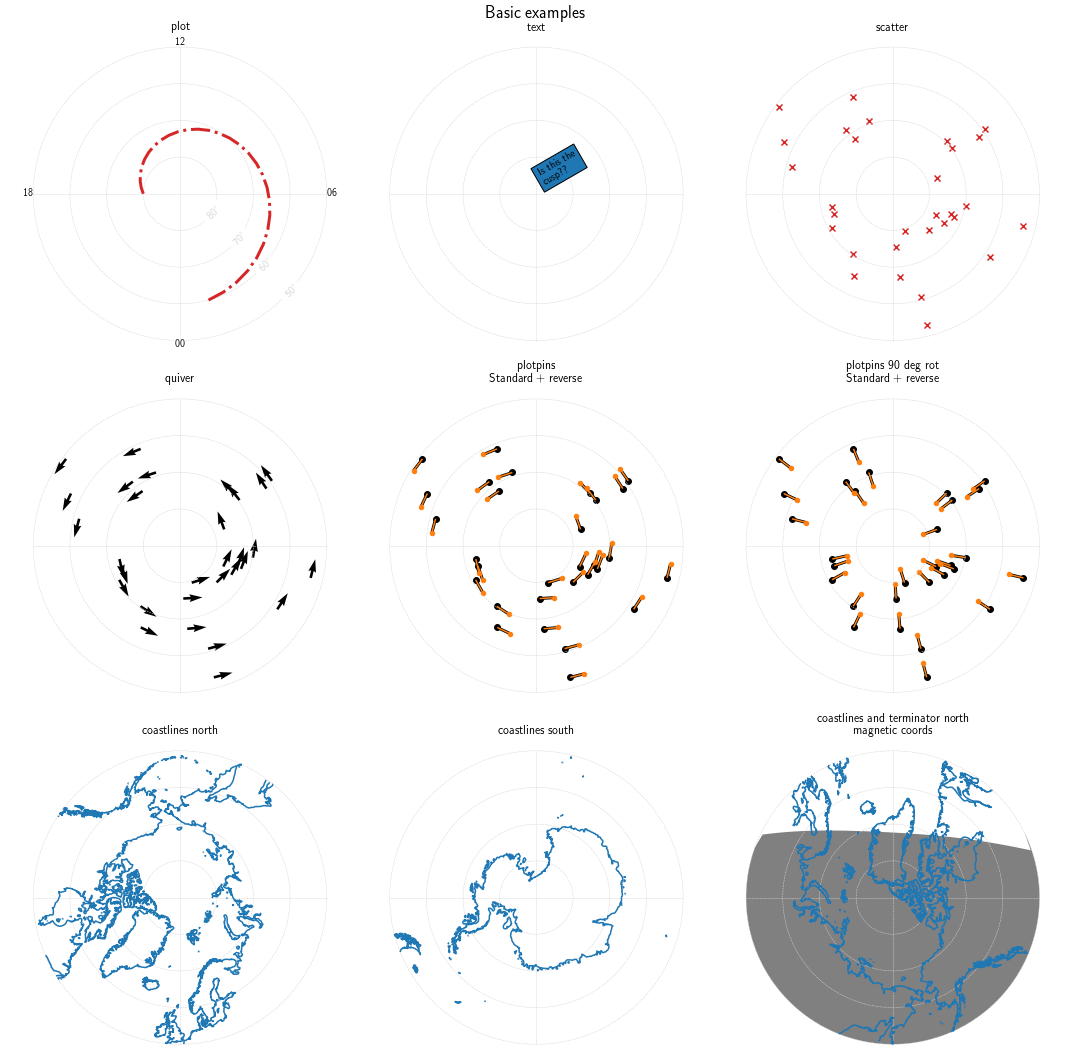

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import polplot

from importlib import reload
reload(polplot)

import datetime as dt
import apexpy 

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))
paxes = np.array([polplot.Polarplot(a) for a in  axes.flatten()]).reshape(axes.shape)

# EXAMPLE PARAMETERS
N = 30 # number of random points
mlat, mlt = np.random.random(N)*30 + 50, np.random.random(N)*24
east, poleward = np.ones(N), np.zeros(N)

time = dt.datetime(2023, 11, 18, 13)
apx = apexpy.Apex(time.year)


# PLOT
paxes[0, 0].ax.set_title('plot')
paxes[0, 0].plot(np.linspace(60, 80, N), np.linspace(1, 18, N), color = 'C3', linewidth = 3, linestyle = '-.')
paxes[0, 0].writeLTlabels()
paxes[0, 0].writeLATlabels()

# TEXT
paxes[0, 1].ax.set_title('text')
paxes[0, 1].text(83, 12, 'Is this the\ncusp??', color = 'black', ha = 'left', va = 'center', rotation = 30, backgroundcolor = None)

# SCATTER
paxes[0, 2].ax.set_title('scatter')
paxes[0, 2].scatter(mlat, mlt, color = 'C3', marker = 'x')

# QUIVER
paxes[1, 0].ax.set_title('quiver')
paxes[1, 0].quiver(mlat, mlt, poleward, east)

# PLOTPINS
paxes[1, 1].ax.set_title('plotpins\nStandard + reverse')
paxes[1, 1].plotpins(mlat, mlt, poleward, east, SCALE = 1, markersize = 35, linewidth = 3, zorder = 0)
paxes[1, 1].plotpins(mlat, mlt, poleward, east, SCALE = 1, reverse = True, alpha = 1, colors = 'C1', markercolor = 'C1')

# PLOTPINS WITH ROTATION
paxes[1, 2].ax.set_title('plotpins 90 deg rot\nStandard + reverse')
paxes[1, 2].plotpins(mlat, mlt, poleward, east, rotation = 90, SCALE = 1, markersize = 35, linewidth = 3, zorder = 0)
paxes[1, 2].plotpins(mlat, mlt, poleward, east, rotation = 90, SCALE = 1, reverse = True, alpha = 1, colors = 'C1', markercolor = 'C1')

# COASTLINES NORTH
paxes[2, 0].ax.set_title('coastlines north')
paxes[2, 0].coastlines(north = True)

# COASTLINES NORTH
paxes[2, 1].ax.set_title('coastlines south')
paxes[2, 1].coastlines(north = False)

# COASTLINES NORTH IN MAGNETIC COORDS
paxes[2, 2].ax.set_title('coastlines and terminator north\nmagnetic coords')
paxes[2, 2].coastlines(north = True, mag = apx, time = time)
paxes[2, 2].plot_terminator(time, apex = apx, shadecolor = 'grey', linewidth = 0, zorder = 0)

plt.suptitle('Basic examples', size = 17)
plt.tight_layout()


In this example, we show AMPS model output:

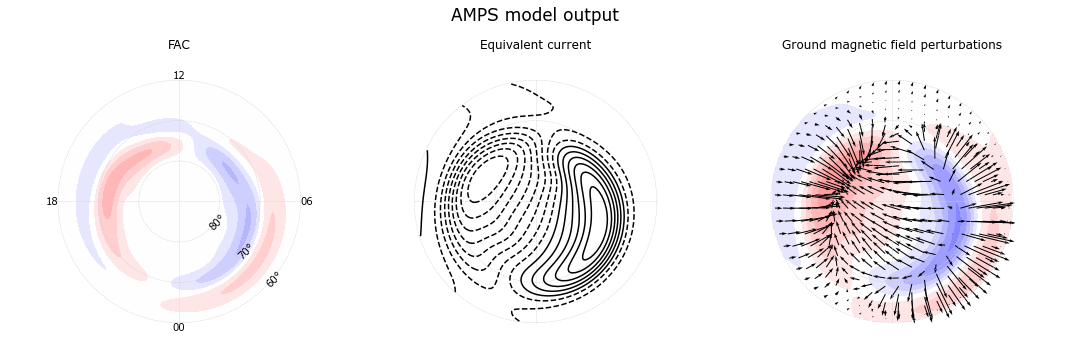

In [2]:
import pyamps # https://github.com/klaundal/pyAMPS - used to get example data

minlat = 60

# set up AMPS model
a = pyamps.AMPS(400, 0, -4, 23, 100, minlat = minlat) # solar wind speed, IMF By, IMF Bz, dipole tilt angle, F10.7
mlats, mlts = map(lambda x: np.split(x, 2)[0], a.scalargrid) # grid for plotting scalar quantities
mlatv, mltv = map(lambda x: np.split(x, 2)[0], a.vectorgrid) # grid for plotting vector quantities

# set up Polarplot objects:
fig, axes = plt.subplots(ncols = 3, nrows = 1, figsize = (15, 5))
paxes = np.array([polplot.Polarplot(a, minlat = 60) for a in  axes.flatten()]).reshape(axes.shape)

# FAC
paxes[0].ax.set_title('FAC')
fac = a.get_upward_current(mlats, mlts)
paxes[0].contourf(mlats, mlts, fac, cmap = plt.cm.bwr, levels = np.linspace(-2, 2, 22))
paxes[0].writeLTlabels()
paxes[0].writeLATlabels(backgroundcolor = (0, 0, 0, 0), color = 'black')

# Equivalent current
paxes[1].ax.set_title('Equivalent current')
psi = a.get_divergence_free_current_function(mlats, mlts)
paxes[1].contour(mlats, mlts, psi, colors = 'black', levels = np.r_[-300:300:20])

# Ground magnetic field
paxes[2].ax.set_title('Ground magnetic field perturbations')
Be, Bn = a.get_ground_perturbation(mlatv, mltv)
Bu = np.split(a.get_ground_Buqd(), 2)[0]
paxes[2].contourf(mlats, mlts, Bu, cmap = plt.cm.bwr, levels = np.linspace(-300, 300, 22))
paxes[2].quiver(mlatv, mltv, Bn, Be, scale = 0.1 * 1e4)


plt.suptitle('AMPS model output', size = 17)
plt.tight_layout()
plt.show()




Next we show how to plot AMPERE maps

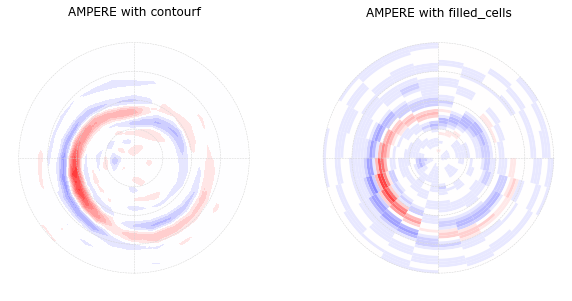

In [3]:
import xarray as xr # for loading the AMPERE ncdf file

fn = './sample_data/20230309.1200.3600.600.north.grd.ncdf' # Downloaded from ampere.jhuapl.edu

data = xr.open_dataset(fn)
lat = 90 - data['cLat_deg'].values[0]
mlt = data['mlt_hr'].values[0]
jr   = data.jPar.values[0]
latres = np.diff(np.sort(np.unique(lat)))[0]
mltres = np.diff(np.sort(np.unique(mlt)))[0]


fig, axes = plt.subplots(figsize = (10, 5), ncols = 2)

paxc = polplot.Polarplot(axes[0])
paxc.ax.set_title('AMPERE with contourf')
paxc.contourf(lat, mlt, jr, cmap = plt.cm.bwr, levels = np.linspace(-2, 2, 22))

paxf = polplot.Polarplot(axes[1])
paxf.ax.set_title('AMPERE with filled_cells')
paxf.filled_cells(lat, mlt, latres, mltres, jr, cmap = plt.cm.bwr, levels = np.linspace(-2, 2, 22))

plt.show()


Next, an example of plotting a UV image of the aurroa, together with coastlines and the sunlight terminator

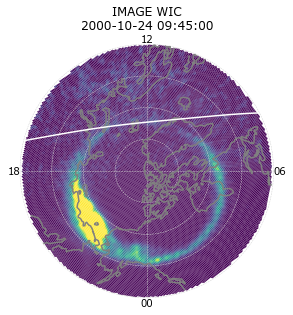

In [4]:
from scipy.io import readsav # for reading IDL save file

fn = './sample_data/wic20002410945.idl'
t = dt.datetime(2000, 10, 24, 9, 45) # according to filename


apx = apexpy.Apex(t.year)
wic = readsav(fn)

mlat = wic['imageinfo']['mlat'][0]
mlt  = wic['imageinfo']['mlt' ][0]
I    = wic['imageinfo']['cimage'][0]

fig, ax = plt.subplots(figsize = (5, 5))
pax = polplot.Polarplot(ax)
pax.plotimg(mlat, mlt, I, crange = (0, 3000))
pax.coastlines(time = t, mag = apx, color = 'grey', resolution = '110m')
pax.plot_terminator(time = t, apex = apx, color = 'white')
pax.writeLTlabels()
pax.ax.set_title('IMAGE WIC\n' + str(t))

plt.show()